In [10]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
train_image_gen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

test_image_gen = ImageDataGenerator(rescale=1/255.0)

In [3]:
train_gen = train_image_gen.flow_from_directory(
    './data/tiny-imagenet-200/train', 
    target_size=((224,224)), 
    batch_size=128,
    class_mode='categorical'
)

Found 100000 images belonging to 200 classes.


In [4]:
train_gen.class_indices

{'n01443537': 0,
 'n01629819': 1,
 'n01641577': 2,
 'n01644900': 3,
 'n01698640': 4,
 'n01742172': 5,
 'n01768244': 6,
 'n01770393': 7,
 'n01774384': 8,
 'n01774750': 9,
 'n01784675': 10,
 'n01855672': 11,
 'n01882714': 12,
 'n01910747': 13,
 'n01917289': 14,
 'n01944390': 15,
 'n01945685': 16,
 'n01950731': 17,
 'n01983481': 18,
 'n01984695': 19,
 'n02002724': 20,
 'n02056570': 21,
 'n02058221': 22,
 'n02074367': 23,
 'n02085620': 24,
 'n02094433': 25,
 'n02099601': 26,
 'n02099712': 27,
 'n02106662': 28,
 'n02113799': 29,
 'n02123045': 30,
 'n02123394': 31,
 'n02124075': 32,
 'n02125311': 33,
 'n02129165': 34,
 'n02132136': 35,
 'n02165456': 36,
 'n02190166': 37,
 'n02206856': 38,
 'n02226429': 39,
 'n02231487': 40,
 'n02233338': 41,
 'n02236044': 42,
 'n02268443': 43,
 'n02279972': 44,
 'n02281406': 45,
 'n02321529': 46,
 'n02364673': 47,
 'n02395406': 48,
 'n02403003': 49,
 'n02410509': 50,
 'n02415577': 51,
 'n02423022': 52,
 'n02437312': 53,
 'n02480495': 54,
 'n02481823': 55,
 '

(128, 224, 224, 3) (128, 200)


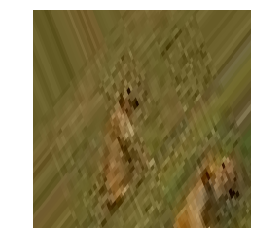

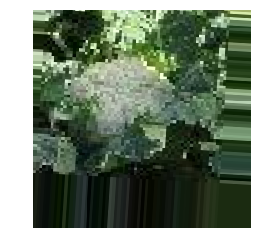

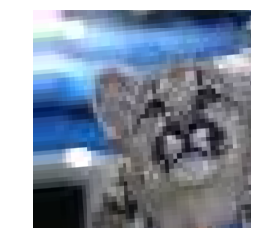

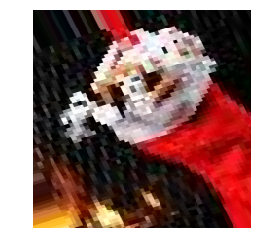

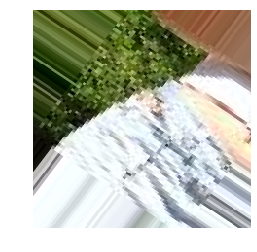

In [5]:
for (x,y) in train_gen:
    print(x.shape, y.shape)
    
    for i in range(5):
        plt.imshow(x[i])
        plt.axis('off')
        plt.show()
        
    break

In [7]:
class_ids = train_gen.class_indices
print(class_ids)

{'n01443537': 0, 'n01629819': 1, 'n01641577': 2, 'n01644900': 3, 'n01698640': 4, 'n01742172': 5, 'n01768244': 6, 'n01770393': 7, 'n01774384': 8, 'n01774750': 9, 'n01784675': 10, 'n01855672': 11, 'n01882714': 12, 'n01910747': 13, 'n01917289': 14, 'n01944390': 15, 'n01945685': 16, 'n01950731': 17, 'n01983481': 18, 'n01984695': 19, 'n02002724': 20, 'n02056570': 21, 'n02058221': 22, 'n02074367': 23, 'n02085620': 24, 'n02094433': 25, 'n02099601': 26, 'n02099712': 27, 'n02106662': 28, 'n02113799': 29, 'n02123045': 30, 'n02123394': 31, 'n02124075': 32, 'n02125311': 33, 'n02129165': 34, 'n02132136': 35, 'n02165456': 36, 'n02190166': 37, 'n02206856': 38, 'n02226429': 39, 'n02231487': 40, 'n02233338': 41, 'n02236044': 42, 'n02268443': 43, 'n02279972': 44, 'n02281406': 45, 'n02321529': 46, 'n02364673': 47, 'n02395406': 48, 'n02403003': 49, 'n02410509': 50, 'n02415577': 51, 'n02423022': 52, 'n02437312': 53, 'n02480495': 54, 'n02481823': 55, 'n02486410': 56, 'n02504458': 57, 'n02509815': 58, 'n0266

In [16]:
def load_validation_data(target_size, no_of_classes):
    with open(os.path.join('./data/tiny-imagenet-200/val/', 'val_annotations.txt')) as f:
        lines = f.readlines()
        
        m = len(lines)
        X = np.empty((m, *target_size, 3))
        Y = np.empty(m, dtype=int)
        
        for i, line in enumerate(lines):
            tokens = line.split()
            img_name = tokens[0]
            img_label = tokens[1]
            
            img_url = os.path.join('./data/tiny-imagenet-200/val/images',img_name)
            img = image.load_img(img_url)
            img = img.resize(target_size)
            X[i,] = np.array(img, dtype=np.float32)/255.0
            img.close()
            y[i] = class_ids[img_label]
            
        return X, keras.utils.to_categorical(y,no_of_classes)